In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data = pd.read_csv('data3.csv', encoding='latin-1')

In [22]:
data.head()

,text,label
0,One of a kind Money maker! Try it for free!Fro...,0
1,link to my webcam you wanted Wanna see sexuall...,0
2,Re: How to manage multiple Internet connection...,1
3,[SPAM] Give her 3 hour rodeoEnhance your desi...,0
4,Best Price on the netf5f8m1 (suddenlysusan@Sto...,0


In [12]:
# testing = pd.read_csv('testing.csv', encoding='latin-1')

In [13]:
# testing.head()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import seaborn as sns

In [10]:
X_train,X_test,y_train,y_test = train_test_split(data['text'],data['label'], test_size = 0.2, random_state = 10)

In [11]:
vect = CountVectorizer()

In [12]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [13]:
X_train_df = vect.transform(X_train)

In [14]:
X_test_df = vect.transform(X_test)

In [33]:
ham_words = ''
spam_words = ''
spam = data[data.label == 1]
ham = data[data.label ==0]

In [39]:
for val in spam.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '
for val in ham.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

In [40]:
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)

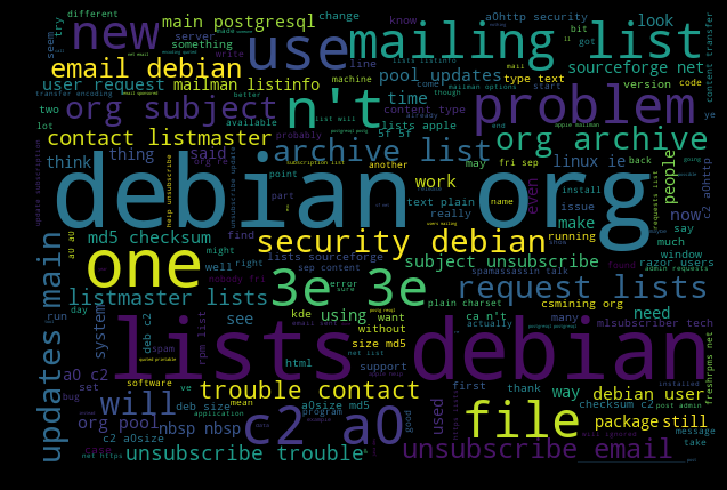

In [41]:
# spam
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [15]:
prediction = dict()
model = MultinomialNB()
model.fit(X_train_df,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
prediction["Multinomial"] = model.predict(X_test_df)

In [17]:
accuracy_score(y_test,prediction["Multinomial"])

0.954

In [18]:
print(classification_report(y_test, prediction['Multinomial'], target_names = ["0", "1"]))

             precision    recall  f1-score   support

          0       0.94      0.91      0.93       163
          1       0.96      0.97      0.97       337

avg / total       0.95      0.95      0.95       500



Text(0.5,15,'Predicted label')

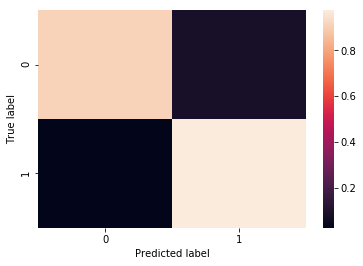

In [19]:
conf_mat = confusion_matrix(y_test, prediction['Multinomial'])
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [52]:
X_test[y_test < prediction["Multinomial"] ]

510     Custom Warez CDsFrom nobody Fri Sep  7 14:49:5...
603     [scoop] ....It is not my fault. .- vwiidHi i'm...
1902    Mother's Day Roses from $19.99From nobody Fri ...
56      you don't satisfy me               FGTPRIL\n\n...
739     [SPAM]  7 new messages from ladies for you (da...
1488    Fast Car Loans - Speed Up the Process of Buyin...
775     [SPAM]  You're officially "in" now\n\n\n\n\n\n...
202     Urgent Business--DeathToSpamDeathToSpamDeathTo...
984     [spam] [SPAM]  Her emotions will go off-scale!...
2390    Fwd: ATM Thiefs - Read the IMP Message...From ...
2366    [SPAM]  Quit Your Day Job Within 30 DaysEver h...
1152    Plans for cable\n\nWant to watch Sporting Even...
1640    [ILUG-Social] re: Guaranteed to lose 10-12 lbs...
2353    One of a kind Money maker! Try it for free!Fro...
Name: text, dtype: object

In [53]:
X_test[y_test > prediction["Multinomial"] ]

97      Re: sed /s/United States/Roman Empire/gHmm, if...
1443    GOVERNMENT REGULATION IS KILLING THE STOCK MAR...
2230    Canadians again - something a little more subs...
2491    New Medications.\nForwarded-by: Rob Windsor \n...
2161    blogged itemBlogStart: \n\n**Dublin**: somethi...
372     Personalize your Palm OS deviceFrom nobody Fri...
2355    FREE SHIPPING! No Minimum Purchase* at Buy.com...
1800    Hanson's Sept 11 message in the National Revie...
194     NYTimes.com Article: After Sept. 11, a Legal B...
Name: text, dtype: object